In [1]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

import swifter
import spacy
import ssl
from spacy import displacy
import pandas as pd
from spacy.lang.en import English
from spacy.pipeline import EntityRuler
from sklearn.metrics import accuracy_score
from spacy.matcher import Matcher
from spacy.pipeline import EntityRuler

from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from fuzzywuzzy import process, fuzz

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
stop=set(stopwords.words('english'))
#nltk.download('stopwords')

from sklearn.linear_model import LogisticRegression

from joblib import Parallel, delayed

from tqdm import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt

import seaborn as sns

import re

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

global cls_acc
cls_acc = 0
global cls_time
cls_time = 0
import time
import io

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from IPython.display import display
from IPython.display import display

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_csv('C:/Users/Olimpio.Dasilva/Desktop/random_sampling/reporting_ncr_all_transactions_202303081406.csv')
df2 = pd.read_excel('C:/Users/Olimpio.Dasilva/Documents/GitHub/merchant_tagging/hive_metastore.smartlink_sz_db.afs_merchant_category_mapping_preview_2023_03_27 (1) (1).xlsx')
df = pd.read_excel('C:/Users/Olimpio.Dasilva/Documents/GitHub/merchant_tagging/hive_metastore.smartlink_sz_db.afs_merchant_category_mapping_preview_2023_03_27.xlsx')
pd.set_option('display.max_colwidth', None)
df = df.sample(500)   #Known Merchants
df2 = df2.sample(500) #Unknown merchants
#df.head(5)

In [3]:
#df2

# Mix (Known and Unknown Merchants)

In [4]:
# Concatenating transaction descriptions columns
df["TRANSACTION_DETAILS"] = df['txn_desc1'].astype(str) +" %%%%% "+ df['txn_desc2'].astype(str)

In [5]:
df["LEN_WORDS"] = df["TRANSACTION_DETAILS"].apply(lambda x: len(str(x).split()))

In [6]:
df["LEN_WORDS"].describe()

count    10000.000000
mean        11.791300
std          4.242328
min          4.000000
25%          9.000000
50%         11.000000
75%         14.000000
max         36.000000
Name: LEN_WORDS, dtype: float64

In [7]:
df["LEN_TOKENS"] = df["TRANSACTION_DETAILS"].apply(lambda x: len(str(x)) / 4)

In [8]:
df["LEN_TOKENS"].describe()

count    10000.000000
mean        18.020775
std          5.597081
min          5.000000
25%         14.000000
50%         17.000000
75%         21.250000
max         51.500000
Name: LEN_TOKENS, dtype: float64

In [9]:
print('Total number of rows and columns:', df.shape)

Total number of rows and columns: (10000, 20)


In [10]:
df.head()

,fi_id,account_id,transaction_id,amount,currency,txn_desc1,txn_desc2,region,transaction_timestamp,merchant_id,merchant_name,payment_agent,payment_agent_id,extract_date,filename,name,category,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS
58420,DI7061,Aa5c24365a76e364aadae7a8a543a9f4d,Tcb208703b4f43db2abe5b4c3e87ce4a2,136.00,USD,"TEXAS ROADHOUSE SPANISH FORK,U",NaN,NaN,2023-01-04,12764,TEXAS ROADHOUSE,Unknow Payment Agent,NaN,2023-01-07,FTS_CSLK_TRANSAC_20230106_100007.csv,Central Bank,Food & Drink,"TEXAS ROADHOUSE SPANISH FORK,U %%%%% nan",6,10.00
20657,DI3008,A8f44f266ac0535c182eeaa70bfd317c3,Tb9cb3796908a30e193f1460a2e1b0582,41.83,USD,POS Transaction,MEIJER 203 BIG RAPIDS MIUS,NaN,2023-03-13,11852,MEIJER,Unknow Payment Agent,NaN,2023-03-16,FTS_CSLK_TRANSAC_20230315_100006.csv,CASE Credit Union,Department Stores,POS Transaction %%%%% MEIJER 203 BIG RAPIDS MIUS,8,12.00
45152,DI1425,A451d0f742df839588019d5772f718ab8,T27f934e7d69438e18377a92800ed36f2,8.01,USD,Withdrawal Debit,BP#*7CIRCL ALTAMONTE SPRFLUS,NaN,2023-02-05,10422,BP AMOCO,Unknow Payment Agent,NaN,2023-02-07,FTS_CSLK_TRANSAC_20230206_100006.csv,Fairwinds Credit Union,Travel,Withdrawal Debit %%%%% BP#*7CIRCL ALTAMONTE SPRFLUS,6,12.75
55503,DI1533,A86d1207657b432e2978226c170838b53,T015f4dd60dab35d3bc58a05ab16b5f40,250.00,USD,ELECTRONIC WITHDRAWAL,CITI CARD ONLINEPAYMENT *,NaN,2023-03-02,10634,CITIGROUP,Unknow Payment Agent,NaN,2023-03-04,FTS_CSLK_TRANSAC_20230303_100007.csv,Point Breeze Credit Union,Banking & Insurance,ELECTRONIC WITHDRAWAL %%%%% CITI CARD ONLINEPAYMENT *,7,13.25
92461,DI3574,A2c09a3a311723ca08e2648d70f9da09a,Tc63700d024a93eeeb97eea67554bbbe6,61.18,USD,POS Withdrawal (FIP) Wal-Mart,Super 2329 WAL-SAMS ORANGE MA(0242),NaN,2022-10-04,13085,WALMART,Unknow Payment Agent,NaN,2022-10-09,FTS_CSLK_TRANSAC_20221008_100033.csv,Workers Credit Union,Department Stores,POS Withdrawal (FIP) Wal-Mart %%%%% Super 2329 WAL-SAMS ORANGE MA(0242),10,17.75


In [11]:
print('Total number of rows and columns:', df2.shape)

Total number of rows and columns: (10000, 17)


In [12]:
df2.head()

,fi_id,account_id,transaction_id,amount,currency,txn_desc1,txn_desc2,region,transaction_timestamp,merchant_id,merchant_name,payment_agent,payment_agent_id,extract_date,filename,name,category
45747,DI3337,Afc4f58b4000838d58d4a50ff59b271b2,Tf9a7d4b8dac73f1c898285a213e29b13,12.00,USD,Withdrawal Debit Card,Touchtunes.helpshift.co TouchTunes.co NY Date 03/13/22 ***45637 5815,NaN,2022-03-13,NaN,Unknow Merchant,Unknow Payment Agent,NaN,2022-03-15,FTS_CSLK_TRANSAC_20220314_100001.csv,Arizona Federal Credit Union,NaN
6779,DI8054,Aa836aee9fdb43d56b6b5553acf3da5ca,T8aa312da24813979b155e8b2a201eca1,0.59,USD,To Share 0001,ROUNDUP SAVINGS,NaN,2022-07-04,NaN,Unknow Merchant,Unknow Payment Agent,NaN,2022-07-07,FTS_CSLK_TRANSAC_20220706_100006.csv,Community Credit Union of Florida,NaN
7108,DI3658,A4c351bad673c34ad9e4218aad011a2a1,T192fb6487a1839f3944241907540b286,68.00,USD,Withdrawal Internet Transfer TO,: XXXX1374,NaN,2022-06-09,NaN,Unknow Merchant,Unknow Payment Agent,NaN,2022-06-11,FTS_CSLK_TRANSAC_20220610_100006.csv,COLUMBIA CREDIT UNION,NaN
76750,DI9094,A35937040b2b332fd989a5bac8f957052,T87984c16ea3d31638616d5c01bde94d4,0.50,USD,International Fee US Funds,International Fee US Funds,NaN,2023-03-12,NaN,Unknow Merchant,Unknow Payment Agent,NaN,2023-03-16,FTS_CSLK_TRANSAC_20230315_100006.csv,Service Federal Credit Union,NaN
41198,DI8100,Abe9a7e355e2e3066ba08465967e9340a,T3b2ae2ec42e835fcb8846c2e084a7331,24.75,USD,Withdrawal Consumer Debit,JASON ALDEANS 307 BROADWAY NASHVILLE TN Date 03/23/23 3 *967 0 5813 %% Card 15 #*5919,NaN,2023-03-24,NaN,Unknow Merchant,Unknow Payment Agent,NaN,2023-03-26,FTS_CSLK_TRANSAC_20230325_100007.csv,Webster First Federal Credit Union,NaN


# Unknown Merchant Names
- Selecting dataset with known menchants only for Entity Ruler
- Selecting dataset with unknown merchants only for Entity recognition
- Checking the number of rows and columns
- Concatenate transaction descriptions columns

In [13]:
df_known_merchs = df[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name','category']].copy(deep=True) 

In [14]:
df_unknown_merchs2 = df2[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name','category']].copy(deep=True)

In [15]:
# Concatenating transaction descriptions columns
df_unknown_merchs2["TRANSACTION_DETAILS"] = df_unknown_merchs2['txn_desc1'].astype(str) +" %%%%% "+ df_unknown_merchs2['txn_desc2'].astype(str)

In [16]:
df_unknown_merchs2["LEN_WORDS"] = df_unknown_merchs2["TRANSACTION_DETAILS"].apply(lambda x: len(str(x).split()))

In [17]:
df_unknown_merchs2["LEN_WORDS"].describe()

count    10000.000000
mean        11.351300
std          4.740837
min          3.000000
25%          8.000000
50%         10.000000
75%         14.000000
max         29.000000
Name: LEN_WORDS, dtype: float64

In [18]:
df_unknown_merchs2["LEN_TOKENS"] = df_unknown_merchs2["TRANSACTION_DETAILS"].apply(lambda x: len(str(x)) / 4)

In [19]:
df_unknown_merchs2["LEN_TOKENS"].describe()

count    10000.000000
mean        17.221175
std          6.471885
min          3.500000
25%         12.500000
50%         16.000000
75%         21.250000
max         43.750000
Name: LEN_TOKENS, dtype: float64

In [20]:
#Copy of the afs merchant names column
df_unknown_merchs2['AFS_MECHANT_NAMES'] = df_unknown_merchs2['merchant_name']
# Droping original cols
df_unknown_merchs2 = df_unknown_merchs2.drop(['txn_desc1', 'txn_desc2','payment_agent','merchant_name'], axis=1)

In [21]:
df_unknown_merchs2

,transaction_id,category,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS,AFS_MECHANT_NAMES
45747,Tf9a7d4b8dac73f1c898285a213e29b13,NaN,Withdrawal Debit Card %%%%% Touchtunes.helpshift.co TouchTunes.co NY Date 03/13/22 ***45637 5815,11,24.00,Unknow Merchant
6779,T8aa312da24813979b155e8b2a201eca1,NaN,To Share 0001 %%%%% ROUNDUP SAVINGS,6,8.75,Unknow Merchant
7108,T192fb6487a1839f3944241907540b286,NaN,Withdrawal Internet Transfer TO %%%%% : XXXX1374,7,12.00,Unknow Merchant
76750,T87984c16ea3d31638616d5c01bde94d4,NaN,International Fee US Funds %%%%% International Fee US Funds,9,14.75,Unknow Merchant
41198,T3b2ae2ec42e835fcb8846c2e084a7331,NaN,Withdrawal Consumer Debit %%%%% JASON ALDEANS 307 BROADWAY NASHVILLE TN Date 03/23/23 3 *967 0 5813 %% Card 15 #*5919,20,29.25,Unknow Merchant
...,...,...,...,...,...,...
31530,Tc665effeef133b8db6b452d720699259,NaN,PMT TO LOAN 123 %%%%% nan,6,6.25,Unknow Merchant
87272,Ta372ab2fa1d53506b9462a11e92f1a19,NaN,AC- PAYPAL INST XFER JAMIE COLLOM %%%%% nan,8,10.75,Unknow Merchant
43537,Ta62beecb157c314bb50384d495691bcc,NaN,POS Withdrawal (FIP) ROUTE 66 %%%%% VAPE A ROUTE 66 VAPE AND S BARSTOW CA(4883),15,19.75,Unknow Merchant
11867,T7731a2e408c63513b64a96242e0a874d,NaN,ATM Withdrawal FAIRWINDS 5020 W %%%%% STATE RD 46 SANFORD FLUS,11,15.50,Unknow Merchant


- Removed “WITHDRAWAL” ,“ATM” and “TRANSFER” rows
- Data cleaning

In [22]:
#df_unknown_merchs2 = df_unknown_merchs2[.str.contains("Withdrawal") == False]
# filter rows without the words 
df_unknown_merchs2 = df_unknown_merchs2[~(df_unknown_merchs2["TRANSACTION_DETAILS"].str.contains('with', case=False) | df_unknown_merchs2['TRANSACTION_DETAILS'].str.contains('transf', case=False) | df_unknown_merchs2['TRANSACTION_DETAILS'].str.contains('ATM'))]

In [23]:
df_unknown_merchs2

,transaction_id,category,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS,AFS_MECHANT_NAMES
6779,T8aa312da24813979b155e8b2a201eca1,NaN,To Share 0001 %%%%% ROUNDUP SAVINGS,6,8.75,Unknow Merchant
76750,T87984c16ea3d31638616d5c01bde94d4,NaN,International Fee US Funds %%%%% International Fee US Funds,9,14.75,Unknow Merchant
67016,T57c09fb134563f3481037c8f92de4e1b,NaN,POS Recurring Debit %%%%% DBT CRD 1358 07/15/22 *46NAV TECH 855-226-8388WWW.NAV.COMUTCard# 1586,12,23.75,Unknow Merchant
59657,T357877fb93df3ed49f1fc592e7bff459,NaN,VENMO PAYMENT %%%%% nan,4,5.75,Unknow Merchant
71281,Tfe674ea96f513ed496101f811d15e0fa,NaN,POS PSEGLONGISLAND 333 EARL %%%%% OVINGTON BUNIONDALE NYUS,8,14.50,Unknow Merchant
...,...,...,...,...,...,...
25798,T6c791e8d241238b5bea3eaaaa5b94d22,NaN,Memory Makers P Alexandria %%%%% nan,6,9.00,Unknow Merchant
20434,T6a32c055e5d8300aaab65cac240e49b4,NaN,DEBIT CARD DEBIT %%%%% auth #* 03-11-2023 CASH APP*TIRRAH LUC *4551 CA,12,17.50,Unknow Merchant
31530,Tc665effeef133b8db6b452d720699259,NaN,PMT TO LOAN 123 %%%%% nan,6,6.25,Unknow Merchant
87272,Ta372ab2fa1d53506b9462a11e92f1a19,NaN,AC- PAYPAL INST XFER JAMIE COLLOM %%%%% nan,8,10.75,Unknow Merchant


In [24]:
df_unknown_merchs2.shape

(3628, 6)

In [25]:
df_unknown_merchs2 = df_unknown_merchs2[df_unknown_merchs2["TRANSACTION_DETAILS"].str.contains("WITHDRAWAL") == False]

In [26]:
df_unknown_merchs2.shape

(3628, 6)

- Known Merchants
- Concatenate transaction descriptions columns

In [27]:
#df_unknown_merchs = df[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name','category']].copy(deep=True)
#df_unknown_merchs = df_unknown_merchs[df["merchant_name"].str.contains("Unknow Merchant") == True]
print('Total number of rows and columns:', df_known_merchs.shape)

Total number of rows and columns: (10000, 6)


In [28]:
# Concatenating transaction descriptions columns
df_known_merchs["TRANSACTION_DETAILS"] = df_known_merchs['txn_desc1'].astype(str) +" %%%%% "+ df_known_merchs['txn_desc2'].astype(str)

In [29]:
df_known_merchs.head(5)

,transaction_id,txn_desc1,txn_desc2,payment_agent,merchant_name,category,TRANSACTION_DETAILS
58420,Tcb208703b4f43db2abe5b4c3e87ce4a2,"TEXAS ROADHOUSE SPANISH FORK,U",NaN,Unknow Payment Agent,TEXAS ROADHOUSE,Food & Drink,"TEXAS ROADHOUSE SPANISH FORK,U %%%%% nan"
20657,Tb9cb3796908a30e193f1460a2e1b0582,POS Transaction,MEIJER 203 BIG RAPIDS MIUS,Unknow Payment Agent,MEIJER,Department Stores,POS Transaction %%%%% MEIJER 203 BIG RAPIDS MIUS
45152,T27f934e7d69438e18377a92800ed36f2,Withdrawal Debit,BP#*7CIRCL ALTAMONTE SPRFLUS,Unknow Payment Agent,BP AMOCO,Travel,Withdrawal Debit %%%%% BP#*7CIRCL ALTAMONTE SPRFLUS
55503,T015f4dd60dab35d3bc58a05ab16b5f40,ELECTRONIC WITHDRAWAL,CITI CARD ONLINEPAYMENT *,Unknow Payment Agent,CITIGROUP,Banking & Insurance,ELECTRONIC WITHDRAWAL %%%%% CITI CARD ONLINEPAYMENT *
92461,Tc63700d024a93eeeb97eea67554bbbe6,POS Withdrawal (FIP) Wal-Mart,Super 2329 WAL-SAMS ORANGE MA(0242),Unknow Payment Agent,WALMART,Department Stores,POS Withdrawal (FIP) Wal-Mart %%%%% Super 2329 WAL-SAMS ORANGE MA(0242)


In [30]:
df_unknown_merchs2.shape

(3628, 6)

In [31]:
df_unknown_merchs2.head(5)

,transaction_id,category,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS,AFS_MECHANT_NAMES
6779,T8aa312da24813979b155e8b2a201eca1,NaN,To Share 0001 %%%%% ROUNDUP SAVINGS,6,8.75,Unknow Merchant
76750,T87984c16ea3d31638616d5c01bde94d4,NaN,International Fee US Funds %%%%% International Fee US Funds,9,14.75,Unknow Merchant
67016,T57c09fb134563f3481037c8f92de4e1b,NaN,POS Recurring Debit %%%%% DBT CRD 1358 07/15/22 *46NAV TECH 855-226-8388WWW.NAV.COMUTCard# 1586,12,23.75,Unknow Merchant
59657,T357877fb93df3ed49f1fc592e7bff459,NaN,VENMO PAYMENT %%%%% nan,4,5.75,Unknow Merchant
71281,Tfe674ea96f513ed496101f811d15e0fa,NaN,POS PSEGLONGISLAND 333 EARL %%%%% OVINGTON BUNIONDALE NYUS,8,14.50,Unknow Merchant


In [32]:
def word_cloud(a):
    # Word cloud for more frequent merchant names
    text = " ".join(i for i in a)
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    plt.figure( figsize=(7,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [33]:
#Copy of the afs merchant names column
df_known_merchs['AFS_MECHANT_NAMES'] = df_known_merchs['merchant_name']
# Droping original cols
df_known_merchs = df_known_merchs.drop(['txn_desc1', 'txn_desc2','payment_agent','merchant_name'], axis=1)

In [34]:
df_known_merchs.head(5)

,transaction_id,category,TRANSACTION_DETAILS,AFS_MECHANT_NAMES
58420,Tcb208703b4f43db2abe5b4c3e87ce4a2,Food & Drink,"TEXAS ROADHOUSE SPANISH FORK,U %%%%% nan",TEXAS ROADHOUSE
20657,Tb9cb3796908a30e193f1460a2e1b0582,Department Stores,POS Transaction %%%%% MEIJER 203 BIG RAPIDS MIUS,MEIJER
45152,T27f934e7d69438e18377a92800ed36f2,Travel,Withdrawal Debit %%%%% BP#*7CIRCL ALTAMONTE SPRFLUS,BP AMOCO
55503,T015f4dd60dab35d3bc58a05ab16b5f40,Banking & Insurance,ELECTRONIC WITHDRAWAL %%%%% CITI CARD ONLINEPAYMENT *,CITIGROUP
92461,Tc63700d024a93eeeb97eea67554bbbe6,Department Stores,POS Withdrawal (FIP) Wal-Mart %%%%% Super 2329 WAL-SAMS ORANGE MA(0242),WALMART


# Named Entity Recognition
- Created a copy of df_known_merchs for predictions purposes - "df_known_merchs_pred"
- Created the PREDICTIONS column
- Used NER from Spacy
- Applied Entity Ruler to add all the merchants (PATTERNS) from AFS into the model
- Defined function to find patterns from AFS predictions - "def_patterns"
- Defined function to find the organisations in the Transaction details column - "find_org"
- Defined funtion to implement parallel processing = "find_org_parallel"
- Implemented cust NER model and displayed the results

In [35]:
df_known_merchs_pred = df_known_merchs.copy(deep=True)
df_known_merchs_pred['AFS_MECHANT_NAMES'] = df_known_merchs_pred['AFS_MECHANT_NAMES'] #.str.lower()
df_known_merchs_pred['TRANSACTION_DETAILS']= df_known_merchs_pred['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")
#df_known_merchs_pred['TRANSACTION_DETAILS']= df_known_merchs_pred['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")

In [36]:
df_unknown_merchs_pred2 = df_unknown_merchs2.copy(deep=True)
df_unknown_merchs_pred2['AFS_MECHANT_NAMES'] = df_unknown_merchs_pred2['AFS_MECHANT_NAMES'] #.str.lower()
df_unknown_merchs_pred2['TRANSACTION_DETAILS']= df_unknown_merchs_pred2['TRANSACTION_DETAILS'].str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ").str.replace('DBT', '')
#df_unknown_merchs_pred2['TRANSACTION_DETAILS']= df_unknown_merchs_pred2['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")

In [37]:
df_known_merchs_pred.head(5)

,transaction_id,category,TRANSACTION_DETAILS,AFS_MECHANT_NAMES
58420,Tcb208703b4f43db2abe5b4c3e87ce4a2,Food & Drink,texas roadhouse spanish fork u %%%%% nan,TEXAS ROADHOUSE
20657,Tb9cb3796908a30e193f1460a2e1b0582,Department Stores,pos transaction %%%%% meijer 203 big rapids mius,MEIJER
45152,T27f934e7d69438e18377a92800ed36f2,Travel,withdrawal debit %%%%% bp 7circl altamonte sprflus,BP AMOCO
55503,T015f4dd60dab35d3bc58a05ab16b5f40,Banking & Insurance,electronic withdrawal %%%%% citi card onlinepayment,CITIGROUP
92461,Tc63700d024a93eeeb97eea67554bbbe6,Department Stores,pos withdrawal (fip) wal-mart %%%%% super 2329 wal-sams orange ma(0242),WALMART


- Defining patterns for Entity Ruler
- Adding rules to "patterns" using def_patterns() function
- find_org() function to implement Entity Ruler and extract entities
- "junk" list created to avoid noise in results

In [38]:
def def_patterns(a):

    #Creating a list of patterns - with all the merchant names (with and without spaces, quotes, .com, etc.)

    org =  a #df_known_payment_agents['AFS_MECHANT_NAMES']

    #List of Entities and Patterns
    org_list = org.tolist()

    a = [ x.strip() for x in org_list] # list comprehension - all merchant names from original org_list
    a_space =list(filter(lambda x: ' ' in x, a)) # filtering all names w spaces
    a_nospace = [x.replace(' ', '') for x in a_space] # replacing spaces w ''

    a_quo =list(filter(lambda x: "'" in x, a)) # filtering all names w quotes
    a_noquuo = [x.replace("'", '') for x in a_quo] # replacing quotes w ''

    a_com =list(filter(lambda x: '.com' in x, a)) # filtering all names w .com
    a_nocom = [x.replace('.com', '') for x in a_com] # replacing .com w ''

    a_dash =list(filter(lambda x: '-' in x, a)) # filtering all names w dash
    a_nodash = [x.replace('-', '') for x in a_com] # replacing dash w ''

    new_lis = a + a_nospace + a_nocom + a_noquuo + a_nodash # add instead of dis_list


    # Creating a list of patterns with all the variations from new_lis
    patterns = []
    i = 0
    new_lis = tuple(new_lis)
    for item in new_lis:
        patterns.append({"label": 'ORG', "pattern": [{"LOWER":item}]})
        # patterns.append({"label": 'ORG', "pattern": new_lis[i]})
        i+=1

    # #print(patterns)
    #patterns.append(listb)
    #print(patterns)


    return patterns

In [39]:
patterns = def_patterns(df_known_merchs_pred['AFS_MECHANT_NAMES'])

In [40]:
# Function to find merchant names in a string - using an NER model with the previously created patterns

def find_org(text:str):
    
    #Build upon the spaCy Model
    NER2 = spacy.load("en_core_web_lg")
    
    #Create the EntityRuler
    ruler = NER2.add_pipe("entity_ruler", config={'validate': True})
     
    ruler.add_patterns(patterns)
    doc_ner = NER2(text)
    
    # useless strings
    junk = ['fip','ca(2810','fis','xx4386', '#185','*','hr0d','k50ms3hv','xx9510','xx4710','xx4706','xx0322','he34i8pz0','xx3840',
            'pd1387','ma(9661','ns4qa9xb3 ','DBT','VISA','PYPL','AMEX','Payment','CRD','DEB','Visa Direct','PYPL','WTHDRL','OverDraft',
            'Payroll','NIC','-0118','855-','-0118','POS PURCH','-0118','855-','ref auth','800-712-5407','PIN','-0118','888-',
            '-0118','855-','ON 10/25 TST','855-','ON 10/25 TST','POS DEBIT','800-712-5407','POS PURCH','ON 10/25 TST','-0118','PIN','DEUS',
            '-1419','TST','TRF','ref auth','FLUS','-1419','-1419','XFER','POS DEBIT','-8016','ref auth','-8016','AVE','1943','POS DEBIT','PAYPAL',
            'CRD 1812 09/10/22','XX8963 POS','POS Transaction','ref  auth', 'DEBIT','-9143','Date 07/31/22  51630 5999','06/14/22,(03/21/23','DEBIT',
            '-6417','4551','877-','01/28/23','ref  auth','auth','ref','Purchase','CRD','PUR']
    
    #extract entities
    orgs = []
    for ent in doc_ner.ents:
        if ((ent.label_ == "ORG") and (ent.text not in junk)):
            orgs.append(ent.text)
    orgs = list(set(orgs))
    return ' '.join(orgs) if orgs else 'NA'

In [41]:
def find_org_parallel(a:dict):
    i=a.copy()
    print(i)
    result = find_org(i['TRANSACTION_DETAILS'])
    i['PREDICTIONS']= result
    print(i)
    return i

In [42]:
df_known_merchs_pred.head(5)

,transaction_id,category,TRANSACTION_DETAILS,AFS_MECHANT_NAMES
58420,Tcb208703b4f43db2abe5b4c3e87ce4a2,Food & Drink,texas roadhouse spanish fork u %%%%% nan,TEXAS ROADHOUSE
20657,Tb9cb3796908a30e193f1460a2e1b0582,Department Stores,pos transaction %%%%% meijer 203 big rapids mius,MEIJER
45152,T27f934e7d69438e18377a92800ed36f2,Travel,withdrawal debit %%%%% bp 7circl altamonte sprflus,BP AMOCO
55503,T015f4dd60dab35d3bc58a05ab16b5f40,Banking & Insurance,electronic withdrawal %%%%% citi card onlinepayment,CITIGROUP
92461,Tc63700d024a93eeeb97eea67554bbbe6,Department Stores,pos withdrawal (fip) wal-mart %%%%% super 2329 wal-sams orange ma(0242),WALMART


In [43]:
df_unknown_merchs_pred2.head(10)

,transaction_id,category,TRANSACTION_DETAILS,LEN_WORDS,LEN_TOKENS,AFS_MECHANT_NAMES
6779,T8aa312da24813979b155e8b2a201eca1,NaN,To Share 0001 %%%%% ROUNDUP SAVINGS,6,8.75,Unknow Merchant
76750,T87984c16ea3d31638616d5c01bde94d4,NaN,International Fee US Funds %%%%% International Fee US Funds,9,14.75,Unknow Merchant
67016,T57c09fb134563f3481037c8f92de4e1b,NaN,POS Recurring Debit %%%%% CRD 1358 07/15/22 46NAV TECH 855-226-8388WWW.NAV.COMUTCard 1586,12,23.75,Unknow Merchant
59657,T357877fb93df3ed49f1fc592e7bff459,NaN,VENMO PAYMENT %%%%% nan,4,5.75,Unknow Merchant
71281,Tfe674ea96f513ed496101f811d15e0fa,NaN,POS PSEGLONGISLAND 333 EARL %%%%% OVINGTON BUNIONDALE NYUS,8,14.50,Unknow Merchant
22906,T7810c3a8a4d536348bbf1266b9ea554d,NaN,CRD 2049 10/07/22 34 BILLS VENDOR RIDGELANDMS %%%%% nan,10,15.00,Unknow Merchant
30657,Td15a0003e8ce3beba2da90134ca24e31,NaN,DEBIT CARD DEBIT %%%%% 02-21-2023 TST BIG DADDY S MERIDIAN ID,12,16.00,Unknow Merchant
34641,Tbe292b6495123838b5dc8c60897c66e9,NaN,POS Transaction %%%%% nan,4,6.25,Unknow Merchant
48706,T2628b69b51e739d999c2dfd8f806529b,NaN,POS DEB 1521 09/02/22 58 ATF 2234 PEARLMS %%%%% nan,10,13.00,Unknow Merchant
53461,Te6eeead0bb2a339684a99fa82adaaf5e,NaN,POS DEB 1239 08/06/22 36 NNT ROSES 262 3033 HWY 80/E (PEARL) %%%%% nan,15,18.50,Unknow Merchant


In [44]:
t_list = df_unknown_merchs_pred2[['transaction_id', 'category','TRANSACTION_DETAILS', 'AFS_MECHANT_NAMES']].copy(deep=True).to_dict(orient='records') 
#replace similarity w unique ID

In [45]:
par = Parallel(n_jobs=-1)(delayed(find_org_parallel)(i) for i in tqdm(t_list))

100%|██████████| 3628/3628 [36:27<00:00,  1.66it/s]


In [46]:
df_unknown_merchs_pred2 = pd.DataFrame(par)

In [47]:
par

[{'transaction_id': 'T8aa312da24813979b155e8b2a201eca1',
  'category': nan,
  'TRANSACTION_DETAILS': 'To Share 0001 %%%%% ROUNDUP SAVINGS',
  'AFS_MECHANT_NAMES': 'Unknow Merchant',
  'PREDICTIONS': 'NA'},
 {'transaction_id': 'T87984c16ea3d31638616d5c01bde94d4',
  'category': nan,
  'TRANSACTION_DETAILS': 'International Fee US Funds %%%%% International Fee US Funds',
  'AFS_MECHANT_NAMES': 'Unknow Merchant',
  'PREDICTIONS': 'International Fee US Funds'},
 {'transaction_id': 'T57c09fb134563f3481037c8f92de4e1b',
  'category': nan,
  'TRANSACTION_DETAILS': 'POS Recurring Debit %%%%%  CRD 1358 07/15/22  46NAV TECH 855-226-8388WWW.NAV.COMUTCard 1586',
  'AFS_MECHANT_NAMES': 'Unknow Merchant',
  'PREDICTIONS': 'NA'},
 {'transaction_id': 'T357877fb93df3ed49f1fc592e7bff459',
  'category': nan,
  'TRANSACTION_DETAILS': 'VENMO PAYMENT %%%%% nan',
  'AFS_MECHANT_NAMES': 'Unknow Merchant',
  'PREDICTIONS': 'VENMO'},
 {'transaction_id': 'Tfe674ea96f513ed496101f811d15e0fa',
  'category': nan,
  'TR

In [48]:
df_unknown_merchs_pred2.sample(10)

,transaction_id,category,TRANSACTION_DETAILS,AFS_MECHANT_NAMES,PREDICTIONS
52,T4d99861b7be534d696ecad479f07452d,NaN,Payment to -10L %%%%% IntBkg 12/28/2022 09:40 13035,Unknow Merchant,IntBkg
2,T57c09fb134563f3481037c8f92de4e1b,NaN,POS Recurring Debit %%%%% CRD 1358 07/15/22 46NAV TECH 855-226-8388WWW.NAV.COMUTCard 1586,Unknow Merchant,NA
2486,T40341daba4083262b6ffe7d4414489e9,NaN,PURCHASE %%%%% auth 09-12-2022 C C PETROLEUM MADERA CA,Unknow Merchant,NA
837,Tebc3c522d547363f808e551eb66f1b02,NaN,LAB DOCTOR FORT %%%%% LAUDERDA FLUS : POS Transaction,Unknow Merchant,NA
3004,T790fed24e077315da73cbe583f8cd5a6,NaN,DEBIT CARD DEBIT %%%%% auth 11-03-2022 Afterpay 044- 6 CA,Unknow Merchant,NA
1271,T0895677128da33b682c52053900e1dd0,NaN,SPARE CHANGE-BRISTOL HEALTH %%%%% nan,Unknow Merchant,NA
120,Te47fd2e8b9943a1dbacdfaec69211174,NaN,POS PURCHASE/PIN CRESSON SHOP ' CRESSON PA %%%%% 0,Unknow Merchant,CRESSON
2190,T9f3b9442598b307ab2e2a05cb996e7a2,NaN,Fiiz Drinks Spa Spanish Fork U %%%%% nan,Unknow Merchant,Fiiz Drinks Spa Spanish Fork U
1963,T7d383230a86a3c678d609d93d4b023ca,NaN,CHASE CREDIT CRD %%%%% ID: 9224 CO: CHASE CREDIT CRD NAME: RICHARD J ABRAHAM JR %% ACH ECC WEB,Unknow Merchant,NA
3152,T7c7d0c5470c13071879b61c7f0a4afe3,NaN,PURCHASE ON 02/03 18:00 %%%%% SQ REDMOND RIDGE HIMI Redmond WA CARD NBR: -3714,Unknow Merchant,NA


In [49]:
df_unknown_merchs_pred2 = df_unknown_merchs_pred2[~(df_unknown_merchs_pred2["PREDICTIONS"].str.contains('NA', case=False))]

In [50]:
df_unknown_merchs_pred2.head(200)

,transaction_id,category,TRANSACTION_DETAILS,AFS_MECHANT_NAMES,PREDICTIONS
3,T357877fb93df3ed49f1fc592e7bff459,NaN,VENMO PAYMENT %%%%% nan,Unknow Merchant,VENMO
6,Td15a0003e8ce3beba2da90134ca24e31,NaN,DEBIT CARD DEBIT %%%%% 02-21-2023 TST BIG DADDY S MERIDIAN ID,Unknow Merchant,TST BIG DADDY S MERIDIAN ID
9,Te6eeead0bb2a339684a99fa82adaaf5e,NaN,POS DEB 1239 08/06/22 36 NNT ROSES 262 3033 HWY 80/E (PEARL) %%%%% nan,Unknow Merchant,NNT
10,T76a7adf921913a1fb5965994fde4eef8,NaN,DEBIT CARD DEBIT %%%%% 01-01-2023 CASA TEQUILA CANTIN WARRENTON MO auth,Unknow Merchant,CANTIN CASA
11,Tf13908acb1173ef5b831545880049f82,NaN,CKCD DEBIT 1313 03/09 05:40 STINGER SU PPLY BOYDTON VA %%%%% nan,Unknow Merchant,CKCD
...,...,...,...,...,...
488,T9efdbe45e54e37099d9529e26d13f11e,NaN,POS WD CASH APP THEADIE WH %%%%% 4551 CAUS,Unknow Merchant,WH
489,Te872e6c69c4e323393b7c00b333ed282,NaN,SOFI SECURITIES ACH %%%%% nan,Unknow Merchant,SOFI
495,Tc61ebcabcc853545b7ef8a2e7a442c8a,NaN,Card purchase %%%%% VCN DELAWAREVITALS 9399 (2023-01-30) 866-255-1857 DE 00,Unknow Merchant,VCN
497,T9d92201651eb3079a189a425bb622542,NaN,DEBIT CARD DEBIT %%%%% 03-10-2023 PCA NORTHERN QUE AIRWAY HEIGHTWA,Unknow Merchant,PCA


In [51]:
# set the display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [52]:
print(df_unknown_merchs_pred2)

                         transaction_id  category  \
3     T357877fb93df3ed49f1fc592e7bff459       NaN   
6     Td15a0003e8ce3beba2da90134ca24e31       NaN   
9     Te6eeead0bb2a339684a99fa82adaaf5e       NaN   
10    T76a7adf921913a1fb5965994fde4eef8       NaN   
11    Tf13908acb1173ef5b831545880049f82       NaN   
14    T9208ea4ec76037db904ee77a9acc0f43       NaN   
16    Ta6d8fbdb5d253ffc97e9750794906ff3       NaN   
19    T7b1374177c6e3bcdb9e675be91152c5e       NaN   
21    Tc2fba036c404369ba2637efe0ce409ba       NaN   
22    T262239868153307db6fe656478542c73       NaN   
23    T5688268247d639b2b30a4e1e44972a5a       NaN   
24    T4565ca21801d326aa632f844f857bbfa       NaN   
26    Tb3cafce7cd5d3fe3b8a091d5ddc90b1e       NaN   
32    T69f7ffb8ae8038519314189f5ae571be       NaN   
33    Tf9f6a4785aef30949db1fd723b52c042       NaN   
34    Tfc1854970d2e34eb9ba7104f6ea4adca       NaN   
35    T8d6bb9d67e2d38e0873efcf72d40fe36       NaN   
37    Tc286eac97a40342eb84b9492cefbaafd       

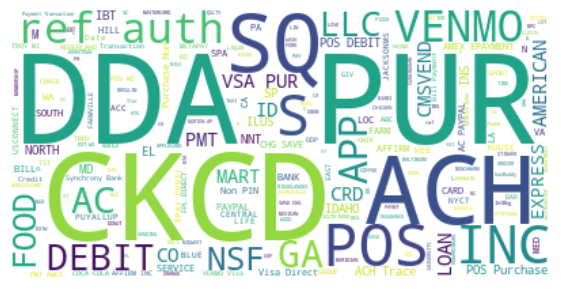

In [53]:
# Word cloud for more frequent merchant names
word_cloud(df_unknown_merchs_pred2.PREDICTIONS)

In [54]:
result_ner = df_unknown_merchs_pred2.head(200)

In [55]:
result_ner

,transaction_id,category,TRANSACTION_DETAILS,AFS_MECHANT_NAMES,PREDICTIONS
3,T357877fb93df3ed49f1fc592e7bff459,NaN,VENMO PAYMENT %%%%% nan,Unknow Merchant,VENMO
6,Td15a0003e8ce3beba2da90134ca24e31,NaN,DEBIT CARD DEBIT %%%%% 02-21-2023 TST BIG DADDY S MERIDIAN ID,Unknow Merchant,TST BIG DADDY S MERIDIAN ID
9,Te6eeead0bb2a339684a99fa82adaaf5e,NaN,POS DEB 1239 08/06/22 36 NNT ROSES 262 3033 HWY 80/E (PEARL) %%%%% nan,Unknow Merchant,NNT
10,T76a7adf921913a1fb5965994fde4eef8,NaN,DEBIT CARD DEBIT %%%%% 01-01-2023 CASA TEQUILA CANTIN WARRENTON MO auth,Unknow Merchant,CANTIN CASA
11,Tf13908acb1173ef5b831545880049f82,NaN,CKCD DEBIT 1313 03/09 05:40 STINGER SU PPLY BOYDTON VA %%%%% nan,Unknow Merchant,CKCD
14,T9208ea4ec76037db904ee77a9acc0f43,NaN,DDA PUR PAYPAL ba %%%%% PAYPAL banniefa San Jose CA,Unknow Merchant,DDA PUR PAYPAL ba
16,Ta6d8fbdb5d253ffc97e9750794906ff3,NaN,POS Debit %%%%% MINT MOBILE 7392 CAUS,Unknow Merchant,MINT
19,T7b1374177c6e3bcdb9e675be91152c5e,NaN,PURCHASE ON 01/11 21:47 %%%%% BALTIMORESUN S BALTIMORESUN SUBSC 443-692-9011 TX CARD NBR: -6605,Unknow Merchant,BALTIMORESUN
21,Tc2fba036c404369ba2637efe0ce409ba,NaN,CASH APP 4551 %%%%% CAUS : POS Transaction REF: 70697 PUR DATE: 06,Unknow Merchant,APP
22,T262239868153307db6fe656478542c73,NaN,DEBIT CARD DEBIT %%%%% auth 07-26-2022 CHICKEN EXPRESS ARLINGTON TX 64842,Unknow Merchant,CHICKEN EXPRESS


In [56]:
# save the dataframe to a CSV file
result_ner.to_csv('result_ner.csv', index=False)